# Plot model population analysis
Code includes:
- Fig 3 panel a: model type performance overview: comparing performance with or without certain model filters for opto, run and eye data
- Fig 3 panel b: population filters

The figure panels are manually stored in the GDrive paper folder 'Hmov_L6S_paper/fig_sources/' and then inserted via Adobe Illustrator into Hmov_L6S_paper/figs/fig_03.ai

## TODO

## Setup

In [1]:
run -im djd.main -- --dbname=dj_lisa --user=write

Connecting write@huxley.neuro.bzm:3306
Connected to database 'dj_lisa' as 'write@10.153.173.165'


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import seaborn as sns

# from djd.hmov_models import _get_data
# from djd.hmov_unit import plot_multi_traces
from djd.glms import get_best_model, plot_model
from djd.plot import cm2inch

# Automatically reload modules to get code changes without restarting kernel
# NOTE: Does not work for DJD table modules
%load_ext autoreload
%autoreload 2

### Set plot parameters

In [3]:
## Update plot parameters
# Option 1: Update general pars from modified matplotlibrc file
# plt.rcParams.update(mpl.rc_params_from_file('../../matplotlibrc', fail_on_error=False, use_default_template=True))

# Option 2: Dynamically update general pars (use if not updating from modified matplotlibrc)
plt.rcParams.update({
    'figure.dpi': 150,
    'figure.max_open_warning': 0, 
    'axes.linewidth': 0.5,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
    'axes.labelsize': 'medium',
    'font.sans-serif': ['Arial'],
    'pdf.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    'ps.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    })


# Dynamically update plot-specific pars
plt.rcParams.update({
    'font.size': 8,
    'axes.labelsize': 7.0,
    'axes.titlesize': 8,
    'legend.fontsize': 7,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,    
    })

In [4]:
# Make figure directory unless it already exists
fig_dir = os.path.join(os.getcwd(), 'figs')  # os.path.dirname(__file__) gives DJD path
if not os.path.exists(fig_dir):
    print(f"Making figure save directory: {fig_dir}")
    os.makedirs(fig_dir)

## Plot model type performance overview
- dimensions
  - old Fig2 version: 
    - row_length=2.75, col_length=3.375
    - makes 6.75 x 11 cm
  - vertical Fig3 version: 
    - row_length=3.75, col_length=3.75
    - makes 7.5 x 15 cm

Load model performances for: 
	Stimulus only
	Full model
	Stim+Opto
	Stim+Opto+Run
	Stim+Run
	Stim+Opto+Eye
	Stim+Eye
	Stim+Run+Eye


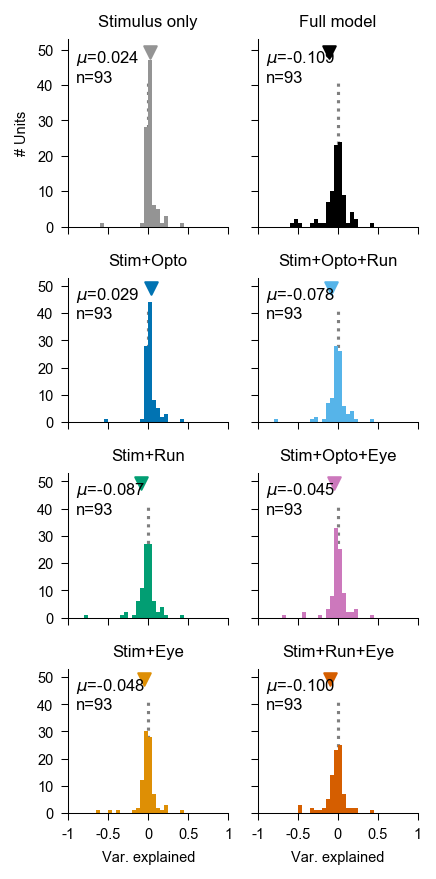

In [4]:
# Select units
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

fig, axs = SplineLNP().plot_performance_overview(keys=keys_crit, pshf_config=False, eval_metric='r2', 
                                                 colors=None, num_cols=2, row_length=3.75, col_length=3.75,
                                                 verbose=True, add_first_subplot_space=0.3)
# fig.savefig('./figs/model_performance_overview_vert.pdf')

Load model performances for: 
	Stimulus only
	Full model
	Stim+Opto
	Stim+Opto+Run
	Stim+Run
	Stim+Opto+Eye
	Stim+Eye
	Stim+Run+Eye


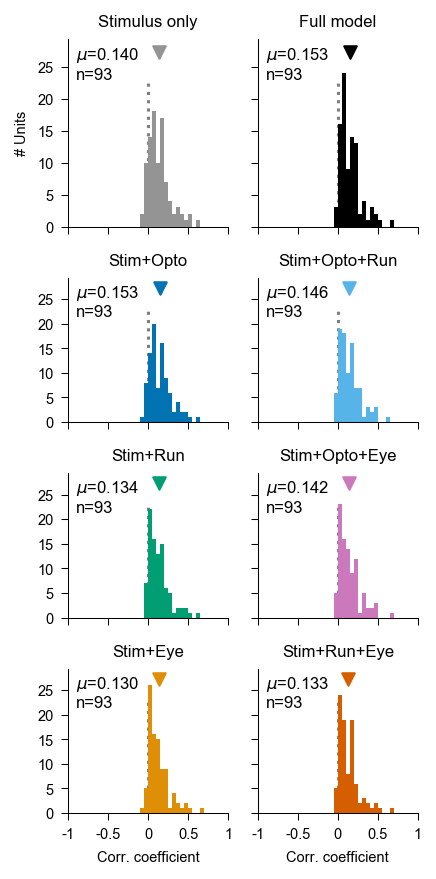

In [5]:
# Select units
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

fig, axs = SplineLNP().plot_performance_overview(keys=keys_crit, pshf_config=False, eval_metric='r', 
                                                 colors=None, num_cols=2, row_length=3.75, col_length=3.75,
                                                 verbose=True, add_first_subplot_space=0.3)
fig.savefig('./figs/model_performance_overview_vert.pdf')

Load model performances for: 
	Stimulus only
	Stim+Opto
	Stim+Run
	Stim+Eye
	Full model
	Stim+Opto+Run
	Stim+Opto+Eye
	Stim+Run+Eye


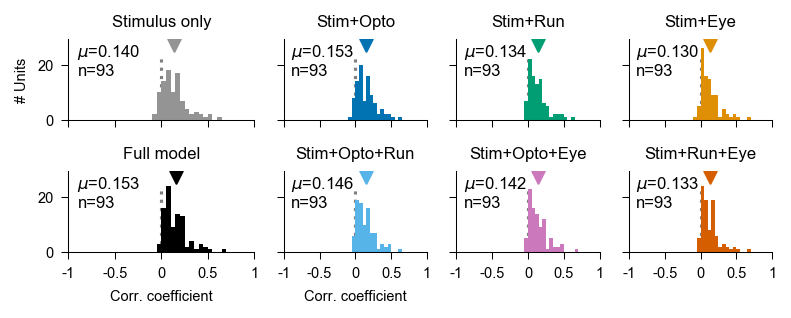

In [7]:
# Select units
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

fig, axs = SplineLNP().plot_performance_overview(keys=keys_crit, pshf_config=False, eval_metric='r', 
                                                 colors=None, num_cols=4, row_length=2.75, col_length=3.375,
                                                 verbose=True, add_first_subplot_space=0.3)
fig.savefig('./figs/model_performance_overview_horiz.pdf')

## Plot model population filters
- dimensions
  - old Fig2 version: 
    - figsize=(3.25, 4.5)
  - vertical Fig3 version: 
    - figsize=(4, 3.5)

### Opto filters

#### Test diff opto filter lengths

Loading models of non-modulated units...
	Number of loaded units: 16
Loading models of modulated units...
	Number of loaded units: 14


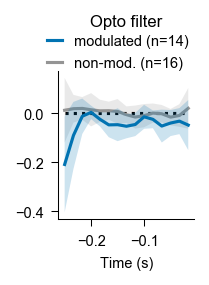

Loading models of non-modulated units...
	Number of loaded units: 70
Loading models of modulated units...
	Number of loaded units: 15


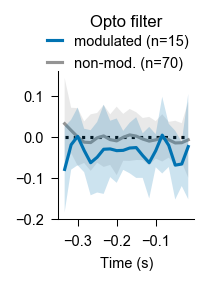

In [13]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_upper = -0.2
thresh_lower = -1.0
fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='omi',
                                                                     filter_len=15,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))
plt.show()

fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='omi',
                                                                     filter_len=20,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))
plt.show()

# fig.savefig('./figs/model_population_filters_opto_02.pdf')

#### Opto filters for plot

Loading models of non-modulated units...
	Number of loaded units: 16
Loading models of modulated units...
	Number of loaded units: 14


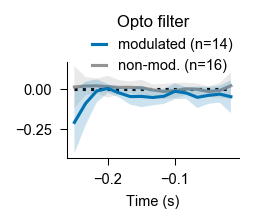

In [10]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_upper = -0.2
thresh_lower = -1.0
fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='omi',
                                                                     filter_len=15,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(4, 3.5),
                                                                     leg_yshift=-0.18)


fig.savefig('./figs/model_population_filters_opto_02.pdf')

Loading models of non-modulated units...
	Number of loaded units: 71
Loading models of modulated units...
	Number of loaded units: 8


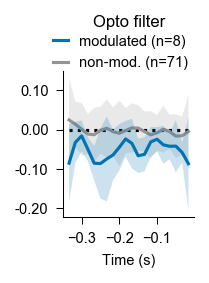

In [9]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_lower = -1.0
thresh_upper = -0.2
filter_len = 20
fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='omi',
                                                                     filter_len=filter_len,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))


fig.savefig('./figs/model_population_filters_opto.pdf')

### Run filters

#### Test diff run filter lengths

Loading models of non-modulated units...
	Number of loaded units: 10
Loading models of modulated units...
	Number of loaded units: 14


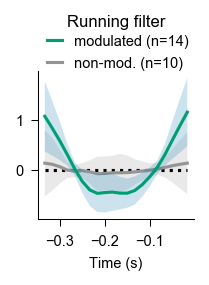

Loading models of non-modulated units...
	Number of loaded units: 37
Loading models of modulated units...
	Number of loaded units: 27


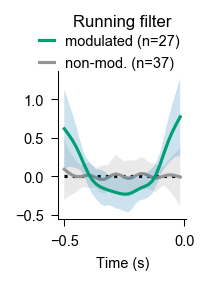

Loading models of non-modulated units...
	Number of loaded units: 37
Loading models of modulated units...
	Number of loaded units: 27


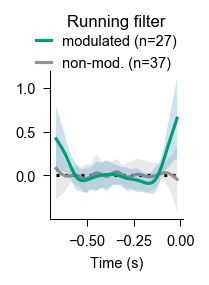

Loading models of non-modulated units...
	Number of loaded units: 37
Loading models of modulated units...
	Number of loaded units: 27


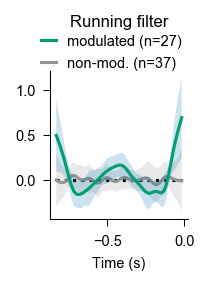

In [11]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_upper=1.0
thresh_lower=0.2

fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='rmi',
                                                                     filter_len=20,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))
plt.show()

fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='rmi',
                                                                     filter_len=30,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))
plt.show()

fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='rmi',
                                                                     filter_len=40,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))
plt.show()

fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='rmi',
                                                                     filter_len=50,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))
plt.show()
# fig.savefig('./figs/model_population_filters_run.pdf')

#### Run filters for plot

Loading models of non-modulated units...
	Number of loaded units: 10
Loading models of modulated units...
	Number of loaded units: 14


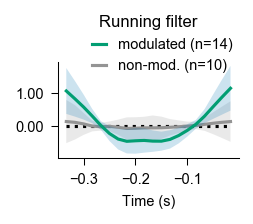

In [5]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_upper=1.0
thresh_lower=0.2

fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='rmi',
                                                                     filter_len=20,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(4, 3.5),
                                                                     leg_yshift=-0.18)
fig.savefig('./figs/model_population_filters_run_02.pdf')

Loading models of non-modulated units...
	Number of loaded units: 37
Loading models of modulated units...
	Number of loaded units: 10


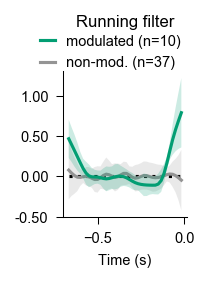

In [11]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_lower=0.35
thresh_upper=1.0
filter_len=40

fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='rmi',
                                                                     filter_len=filter_len,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))
fig.savefig('./figs/model_population_filters_run.pdf')

### Eye filters

#### Eye filters for plot

Loading models of non-modulated units...
	Number of loaded units: 44
Loading models of modulated units...
	Number of loaded units: 8


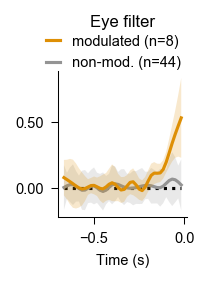

In [12]:
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)

thresh_lower=0.35
thresh_upper=1.0
filter_len=40

fig, axs = (SplineLNP() & keys_crit).plot_filter_split_by_modulation(mi_kind='emi',
                                                                     filter_len=filter_len,
                                                                     thresh_lower=thresh_lower,
                                                                     thresh_upper=thresh_upper,                                                                      
                                                                     zrange=[-.1, .1], 
                                                                     keys=keys_crit,                                                                                                                                          
                                                                     fr_crit=0.1, 
                                                                     pshf_config=False,
                                                                     data_fs=60, 
                                                                     verbose=True,
                                                                     figsize=(3.25, 4.5))
fig.savefig('./figs/model_population_filters_eye.pdf')

## Plot model parameters

### Get model parameters

In [38]:
# Select units: get keys of units meeting selection criteria
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)
keys_crit = pd.DataFrame(keys_crit)
print('N units passing selection criteria =', len(keys_crit))

# Get best model key for each unit (must be full model with opto+run+eye)
keys_bestm = get_best_model(keys_crit, model_type='SplineLNP', crit='spl_r_val', groupby=['m','s','u'],
                            opto_config='True', opto_len='_', run_config='True', run_len='_',
                            eye_config='True', eye_len='_', pshf_config='False', paramset_ids=None,
                            key_only=True, format='df', verbose=True)

# Get unit info for best models
df = pd.DataFrame((SplineLNP.Eval() * SplineLNPParams() & keys_bestm
                  ).fetch(dj.key, 'spl_rf_area', 'spl_rf_val', 'spl_lambda', as_dict=True))
df.rename(columns={'spl_rf_area': 'rf_area', 'spl_rf_val': 'rf_polarity', 'spl_lambda': 'regularization'}, inplace=True)
df

N units passing selection criteria = 93


,m,s,e,u,spl_paramset,spl_stim,rf_area,rf_polarity,regularization
0,Ntsr1Cre_2019_0007,6,9,1,101,hmov,26.72750,0.272459,1.0
1,Ntsr1Cre_2019_0007,6,9,2,755,hmov,7.40762,-0.209872,5.0
2,Ntsr1Cre_2019_0007,6,9,3,104,hmov,56.05770,0.995712,2.5
3,Ntsr1Cre_2019_0007,6,9,4,803,hmov,1.20124,-0.184902,5.0
4,Ntsr1Cre_2019_0007,6,9,5,102,hmov,22.62330,-0.557221,1.0
...,...,...,...,...,...,...,...,...,...
88,Ntsr1Cre_2020_0002,6,6,28,105,hmov,1.20124,-0.251734,2.5
89,Ntsr1Cre_2020_0002,6,6,30,104,hmov,26.82760,-0.427840,2.5
90,Ntsr1Cre_2020_0002,6,6,33,104,hmov,12.21260,0.543853,2.5
91,Ntsr1Cre_2020_0002,6,6,38,104,hmov,13.61400,0.551150,2.5


### Plot RF area in one violinplot

          rf_area
median  26.727500
mean    52.850528
std     56.441907
count   93.000000


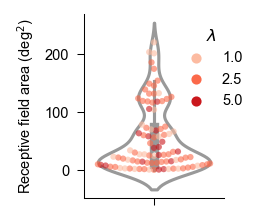

In [55]:
fig, ax = plt.subplots(1,1,figsize=cm2inch((4.14, 3.44)), constrained_layout=True)
sns.violinplot(data=df, y='rf_area', color='white', bw=.3, ax=ax)#,)
sns.swarmplot(data=df, y='rf_area', hue='regularization', x=[""]*len(df), size=3, alpha=0.6, palette='Reds', ax=ax)
ax.set_ylabel('Receptive field area (deg$^2$)')
ax.legend(frameon=False, title='$\lambda$', markerscale=0.5, bbox_to_anchor= (0.6, 1))
sns.despine()
fig.patch.set_facecolor('white')

print(df[['rf_area']].agg(['median', 'mean', 'std', 'count']))

fig.savefig('./figs/model_population_rf_area.pdf')

### Plot RF area split by regularization

                 rf_area                            
                  median       mean        std count
regularization                                      
1.0             26.76895  57.498493  67.866158    24
2.5             24.82560  54.606585  56.359370    53
5.0             34.76475  40.061639  35.288445    16


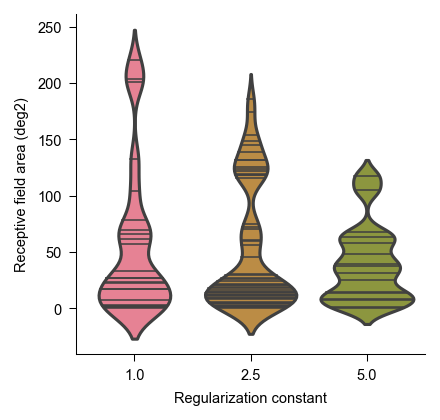

In [11]:
import matplotlib.colors

colormap = 'husl'
sns_cmap = sns.color_palette(colormap, 8).as_hex()
cmap = matplotlib.colors.ListedColormap(sns_cmap)

fig, ax = plt.subplots(1,1,figsize=(3,3), dpi=150)
sns.violinplot(data=df, x='regularization', y='rf_area', palette=sns_cmap, inner="stick", bw=.2, ax=ax)
ax.set_ylabel('Receptive field area (deg2)')
ax.set_xlabel('Regularization constant')

sns.despine()

fig.patch.set_facecolor('white')

print(df[['rf_area']].groupby(df['regularization']).agg(['median', 'mean', 'std', 'count']))

#fig.savefig('./plots/RF_area_vs_reg_const.png', dpi=150, bbox_inches='tight', facecolor=fig.get_facecolor(), transparent=False)

### Plot RF polarity

        rf_polarity
median     0.310118
mean       0.086964
std        0.490990
count     93.000000


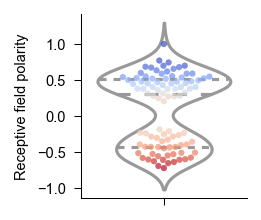

In [71]:
fig, ax = plt.subplots(1,1,figsize=cm2inch((4.14, 3.44)), constrained_layout=True)
sns.violinplot(data=df, y='rf_polarity', color='white', inner='quartiles', bw=.3, ax=ax)#,)
sns.swarmplot(data=df, y='rf_polarity', hue='rf_polarity', x=[""]*len(df), size=3, alpha=0.7, palette='coolwarm_r', 
              vmin=-1, vmax=1, ax=ax)
ax.set_ylabel('Receptive field polarity')
# ax.legend(frameon=False, title='$\lambda$', markerscale=0.5, bbox_to_anchor= (0.6, 1))
ax.legend([],[], frameon=False)
sns.despine()
fig.patch.set_facecolor('white')

print(df[['rf_polarity']].agg(['median', 'mean', 'std', 'count']))

fig.savefig('./figs/model_population_rf_polarity.pdf')

### Plot RF area and polarity combined in one figure

          rf_area  rf_polarity
median  26.727500     0.310118
mean    52.850528     0.086964
std     56.441907     0.490990
count   93.000000    93.000000


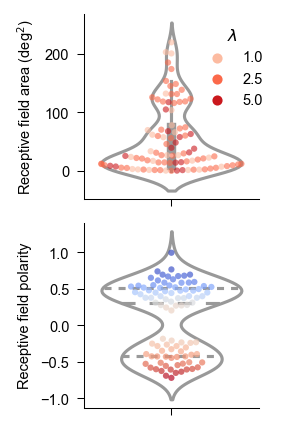

In [72]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=cm2inch((4.5, 7)), constrained_layout=True)

# RF area
sns.violinplot(data=df, y='rf_area', color='white', bw=.3, ax=axs[0])
sns.swarmplot(data=df, y='rf_area', hue='regularization', x=[""]*len(df), size=3, alpha=0.6, palette='Reds', ax=axs[0])
axs[0].set_ylabel('Receptive field area (deg$^2$)')
axs[0].legend(frameon=False, title='$\lambda$', markerscale=0.5, bbox_to_anchor= (0.6, 1))

# RF polarity
sns.violinplot(data=df, y='rf_polarity', color='white', inner='quartiles', bw=.3, ax=axs[1])
sns.swarmplot(data=df, y='rf_polarity', hue='rf_polarity', x=[""]*len(df), size=3, alpha=0.7, palette='coolwarm_r', 
              vmin=-1, vmax=1.5, ax=axs[1])
axs[1].set_ylabel('Receptive field polarity')
axs[1].legend([],[], frameon=False)
sns.despine()
fig.patch.set_facecolor('white')

print(df[['rf_area', 'rf_polarity']].agg(['median', 'mean', 'std', 'count']))

fig.savefig('./figs/model_population_rf_params.pdf')

## TESTING: Get tRF full width half max FWHM
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.peak_widths.html

In [4]:
# Select units: get keys of units meeting selection criteria
keys_crit = HmovUnit().get_crit_set(fr_crit=0.1, opto=True, run=True, eye=True, excl_ctrl_m=True)
keys_crit = pd.DataFrame(keys_crit)
print('N units passing selection criteria =', len(keys_crit))

# Get best model key for each unit (must be full model with opto+run+eye)
keys_bestm = get_best_model(keys_crit, model_type='SplineLNP', crit='spl_r_val', groupby=['m','s','u'],
                            opto_config='True', opto_len='_', run_config='True', run_len='_',
                            eye_config='True', eye_len='_', pshf_config='False', paramset_ids=None,
                            key_only=True, format='df', verbose=True)

N units passing selection criteria = 93


In [5]:
# Get model weights = stRFs
df = pd.DataFrame((SplineLNP() & keys_bestm).fetch(dj.key, 'spl_w_opt', as_dict=True))
df

,m,s,e,u,spl_paramset,spl_stim,spl_w_opt
0,Ntsr1Cre_2019_0007,6,9,1,101,hmov,"[[[1.1662502420274138e-05, -4.647328108442196e..."
1,Ntsr1Cre_2019_0007,6,9,2,755,hmov,"[[[-0.00013806551352430062, 0.0002752111259698..."
2,Ntsr1Cre_2019_0007,6,9,3,104,hmov,"[[[0.00018606448574307906, -0.0001805408771474..."
3,Ntsr1Cre_2019_0007,6,9,4,803,hmov,"[[[-0.0002479987766641335, -0.0001604278580235..."
4,Ntsr1Cre_2019_0007,6,9,5,102,hmov,"[[[8.480287143753039e-05, -2.990520618561882e-..."
...,...,...,...,...,...,...,...
88,Ntsr1Cre_2020_0002,6,6,28,105,hmov,"[[[0.0002969853655118007, 3.493323698776865e-0..."
89,Ntsr1Cre_2020_0002,6,6,30,104,hmov,"[[[-1.1915042232269236e-05, -4.418322902948520..."
90,Ntsr1Cre_2020_0002,6,6,33,104,hmov,"[[[0.00010124628238888341, 1.8755238051179344e..."
91,Ntsr1Cre_2020_0002,6,6,38,104,hmov,"[[[4.3841124407356605e-05, -0.0002851869454069..."


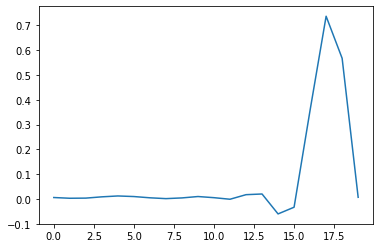

In [8]:
# Extract tRFs
from djd.glms import get_strf_comps  # gets stRF components from model weights

# Get tRF for one good example unit model
strf = df.iloc[2].spl_w_opt  
sRF, tRF = get_strf_comps(strf)
plt.plot(tRF)

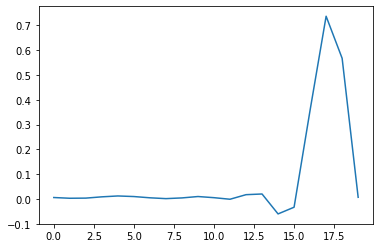

In [11]:
# Apply get_strf_comps() to all models, returning only tRFs (2nd arg)
df['tRF'] = df['spl_w_opt'].apply(lambda x: get_strf_comps(x)[1])  # lambda allows to select fn return arg by idx
plt.plot(df.iloc[2].tRF)

### Find width OPTION 1

In [12]:
# Find peaks
import scipy

# This finds multiple peaks and returns properties if width kwarg is given
peaks, properties = scipy.signal.find_peaks(tRF, height=None, threshold=None, distance=None, 
                                            prominence=None, width=1, wlen=None, rel_height=0.5, plateau_size=None)

In [13]:
peaks

array([ 4,  9, 13, 17])

In [14]:
properties

{'prominences': array([0.00926508, 0.00850042, 0.02119225, 0.73047683]),
 'left_bases': array([ 1,  7, 11, 14]),
 'right_bases': array([11, 11, 14, 19]),
 'widths': array([2.66279837, 1.66909264, 1.55688398, 2.31315481]),
 'width_heights': array([0.00746226, 0.00557245, 0.00944351, 0.37194852]),
 'left_ips': array([ 2.78691429,  8.24362522, 11.57492495, 16.03549065]),
 'right_ips': array([ 5.44971266,  9.91271787, 13.13180893, 18.34864546])}

In [15]:
# Use prominences to extract highest peak
maxidx = properties['prominences'].argmax()
width = properties['widths'][maxidx]
width

2.313154812706564

### Find width OPTION 2 - more direct

In [16]:
maxpeak = np.array([tRF.argmax()])
maxpeak

array([17])

In [17]:
width, w_height, lips, rips = scipy.signal.peak_widths(tRF, maxpeak, rel_height=0.5, prominence_data=None, wlen=None)

In [19]:
w_height

array([0.37194852])

In [20]:
lips

array([16.03549065])

In [21]:
rips

array([18.34864546])

Text([17.19206805], [0.32194852], 'w = 2.31')

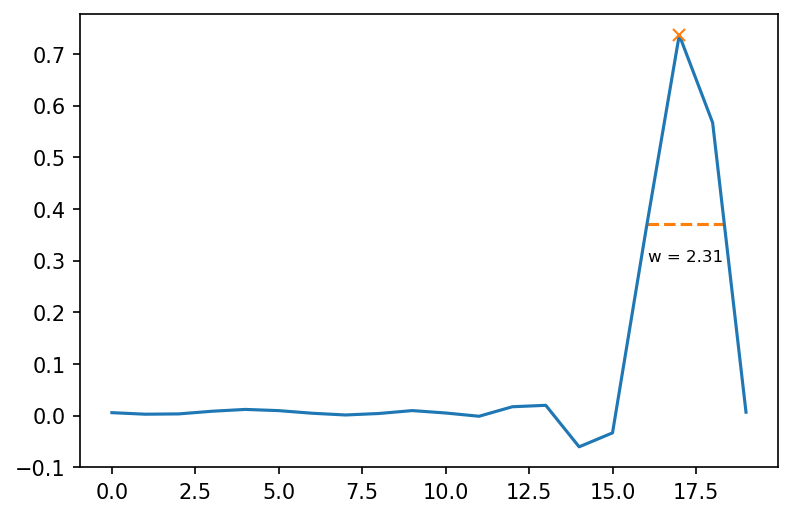

In [28]:
fig, ax = plt.subplots(dpi=150)
plt.plot(tRF)
plt.plot(maxpeak, tRF[maxpeak], "x")
plt.hlines(w_height, lips, rips, color="C1", linestyle='--')
plt.annotate(f'w = {width[0]:.2f}', ((lips + (rips - lips)/2), w_height-0.05), va='top', ha='center', fontsize=8)

In [ ]:
# Apply width function to all models ...

# Convert width into actual time (ms) ...